**MÓDULO #7 - APRENDIZAJE NO SUPERVISADO**

### **TEMA 1: Número de agrupaciones utilizando gráficas**

#### **Cargando y visualizando la Base de Datos Iris**

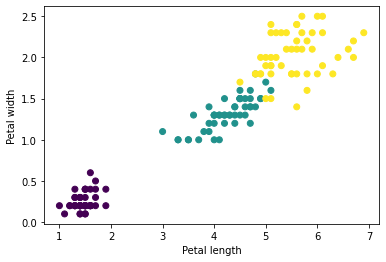

In [ ]:
from sklearn import cluster, datasets, metrics
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = np.array(iris.data)
y = np.array(iris.target)
# Plot the training points
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

### **Número de agrupaciones utilizando la gráfica con el índice Silhouette**

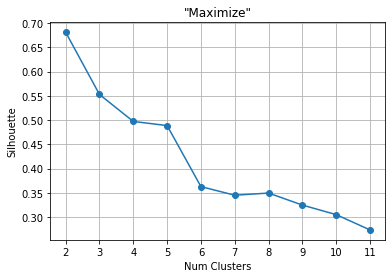

In [ ]:
results = {}
for k in range(2, int(np.sqrt(len(X)))):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  results[k] = metrics.silhouette_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()

### **TEMA 2 Índice Calinski-Harabasz**

### **Estandarizando la Base de Datos Wine**

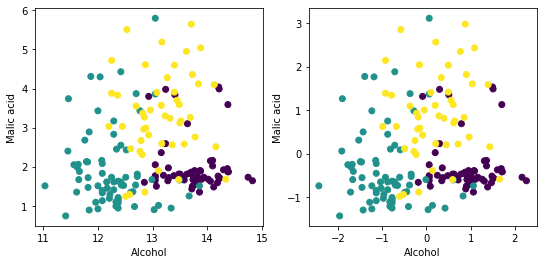

In [ ]:
from sklearn.preprocessing import StandardScaler

wine = datasets.load_wine()
X = np.array(wine.data)
y = np.array(wine.target)

# Plot the training points
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9,4))

ax0.scatter(X[:, 0], X[:, 1], c=y)
ax0.set_xlabel('Alcohol')
ax0.set_ylabel('Malic acid')

# normalize dataset for easier parameter selection
X2 = StandardScaler().fit_transform(X)
ax1.scatter(X2[:, 0], X2[:, 1], c=y)
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

plt.show()

### **Índice Calinski-Harabasz**

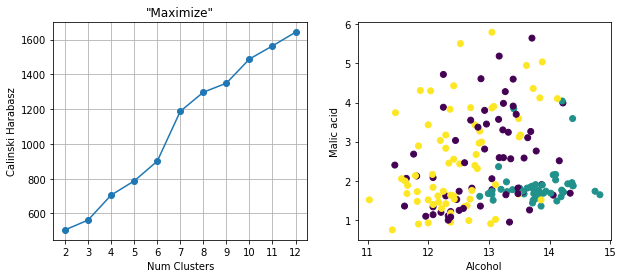

In [ ]:
y_preds = []
results = {}
for k in range(2, int(np.sqrt(len(X)))):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  y_preds.append(y_pred)
  results[k] = metrics.calinski_harabasz_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Calinski Harabasz')

ax1.scatter(X[:, 0], X[:, 1], c=y_preds[1])
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

plt.show()

### **Ventajas de utilizar los datos estandarizados para agrupar**

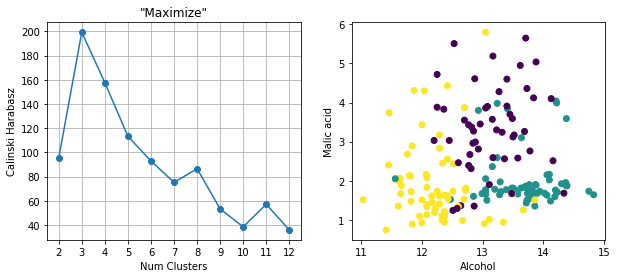

In [ ]:
y_preds = []
results = {}
for k in range(2, int(np.sqrt(len(X2)))):
  k_means = cluster.KMeans(n_clusters=k).fit(X2)
  y_pred = k_means.predict(X2)
  y_preds.append(y_pred)
  results[k] = metrics.calinski_harabasz_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Calinski Harabasz')

ax1.scatter(X[:, 0], X[:, 1], c=y_preds[1])
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

plt.show()

### **TEMA 3 Número de agrupaciones utilizando los valores de los coeficientes de Silhouette (gráfica SilhouettePlot)**

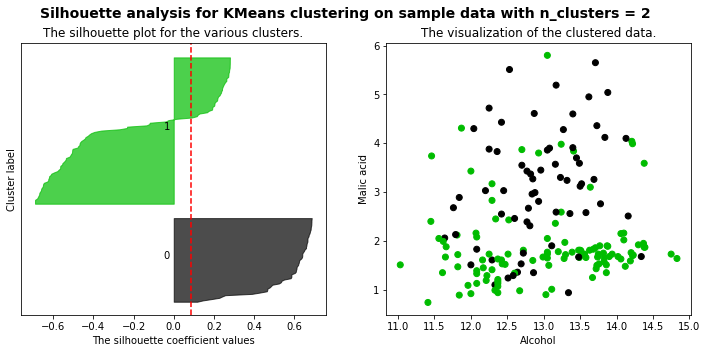

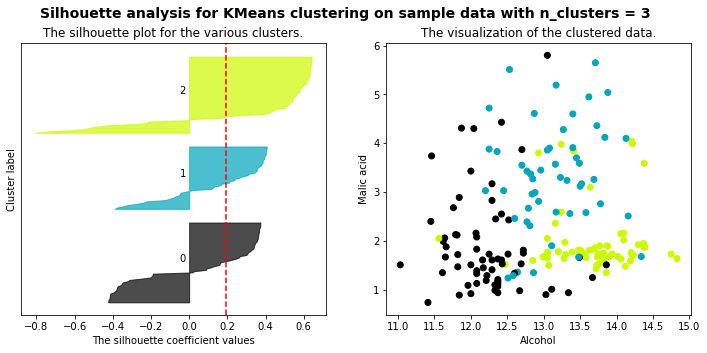

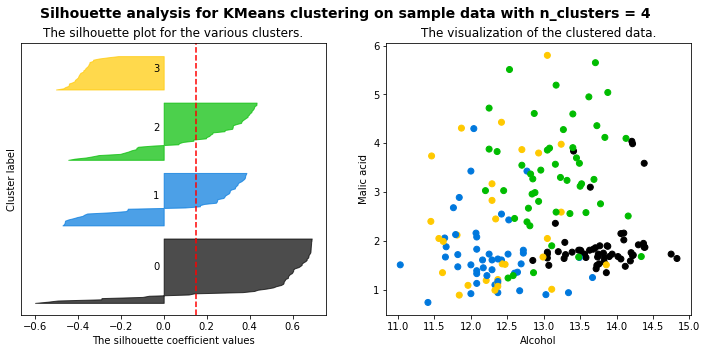

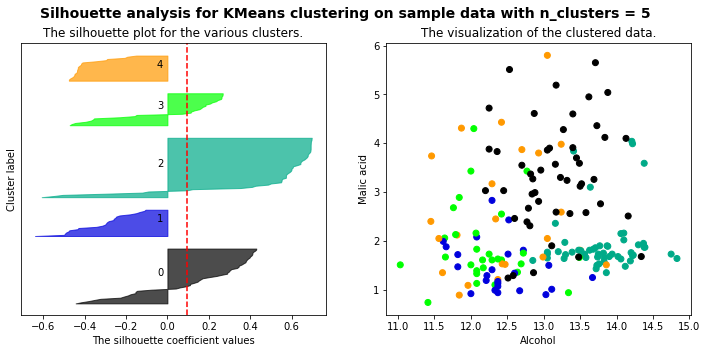

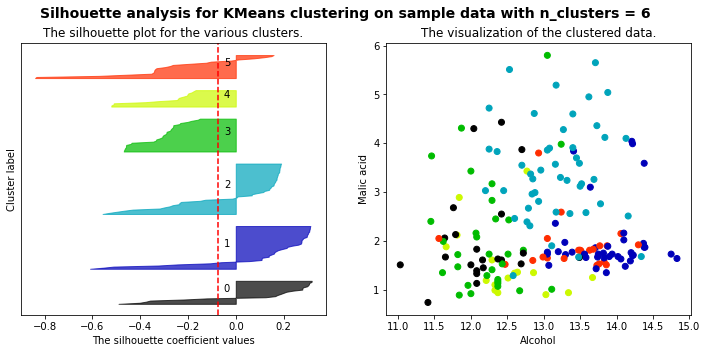

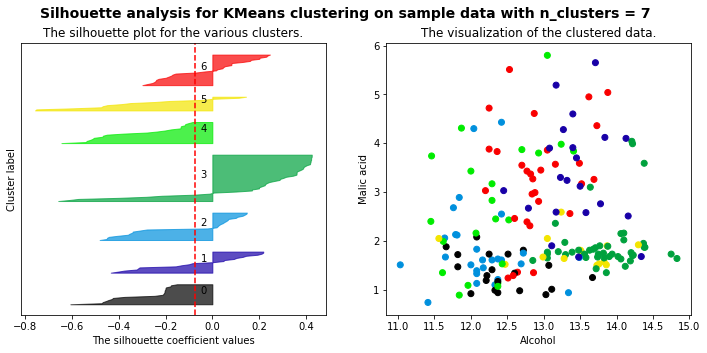

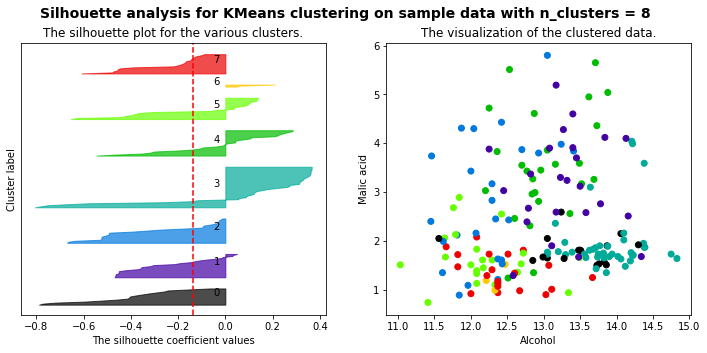

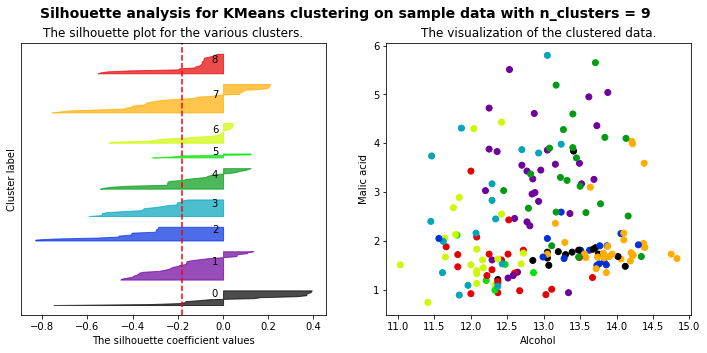

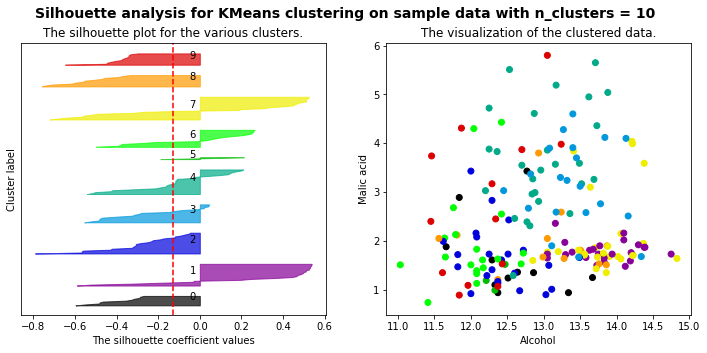

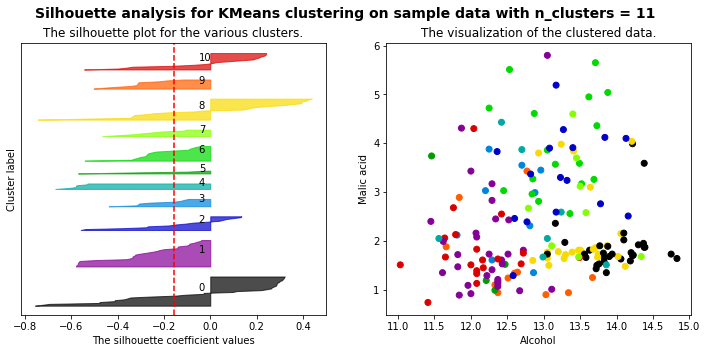

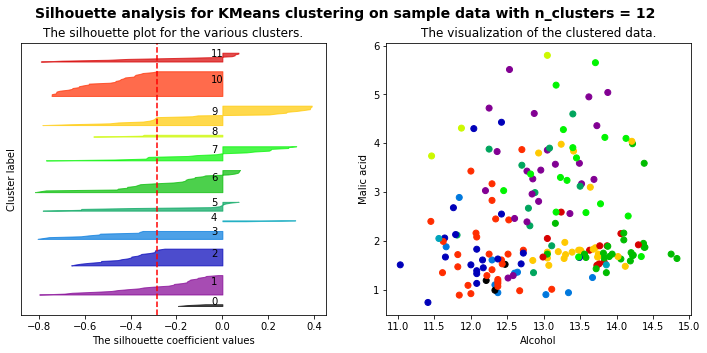

In [ ]:
import matplotlib.cm as cm

n_clusters = list(range(2, int(np.sqrt(len(X)))))
for k in n_clusters:
  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.set_size_inches(12, 5)

  # The (k+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax0.set_ylim([0, len(X) + (k + 1) * 10])

  k_means = cluster.KMeans(n_clusters=k)
  y_pred = k_means.fit_predict(X2)
  silhouette_avg = metrics.silhouette_score(X, y_pred)
  sample_silhouette_values = metrics.silhouette_samples(X, y_pred)

  y_lower = 10
  for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_pred == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax0.set_title("The silhouette plot for the various clusters.")
  ax0.set_xlabel("The silhouette coefficient values")
  ax0.set_ylabel("Cluster label")
  ax0.set_yticks([])  # Clear the yaxis labels / ticks

  # The vertical line for average silhouette score of all the values
  ax0.axvline(x=silhouette_avg, color="red", linestyle="--")

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred.astype(float) / k)
  ax1.scatter(X[:, 0], X[:, 1], c=colors)

  ax1.set_title("The visualization of the clustered data.")
  ax1.set_xlabel('Alcohol')
  ax1.set_ylabel('Malic acid')

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % k),
                fontsize=14, fontweight='bold')

plt.show()

### **TEMA 4 Distancia relativa entre agrupaciones; importancia relativa de las agrupaciones**

### **Comparación relativa de distintos Algoritmos de Agrupamiento**

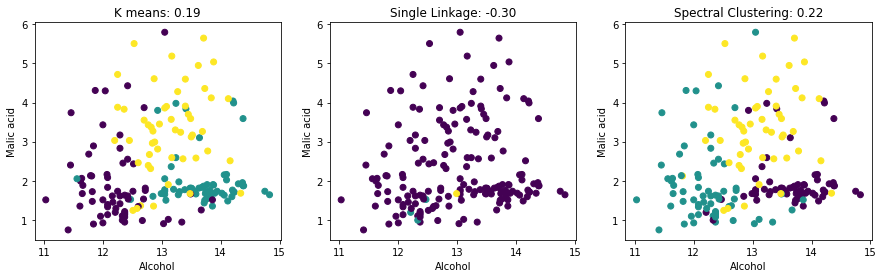

In [ ]:
k = 3

k_means = cluster.KMeans(n_clusters=k)
y_pred1 = k_means.fit_predict(X2)
s1 = metrics.silhouette_score(X, y_pred1)

single_linkage = cluster.AgglomerativeClustering(linkage="single", n_clusters=k)
y_pred2 = single_linkage.fit_predict(X2)
s2 = metrics.silhouette_score(X, y_pred2)

spectral = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
y_pred3 = spectral.fit_predict(X2)
s3 = metrics.silhouette_score(X, y_pred3)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,4))

ax0.scatter(X[:, 0], X[:, 1], c=y_pred1)
ax0.set_title('K means: '+"{:.2f}".format(s1))
ax0.set_xlabel('Alcohol')
ax0.set_ylabel('Malic acid')

ax1.scatter(X[:, 0], X[:, 1], c=y_pred2)
ax1.set_title('Single Linkage: '+"{:.2f}".format(s2))
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic acid')

ax2.scatter(X[:, 0], X[:, 1], c=y_pred3)
ax2.set_title('Spectral Clustering: '+"{:.2f}".format(s3))
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Malic acid')

plt.show()